## 1. Summarize the reasons of overfitting and underfitting. Put them in github repository.

bias,偏差，指的是预测值的期望与真实值之间的差距，偏差越大，越偏离真实数据

variance,方差，指的是预测值的变化范围，离散程度，方差越大，数据越分散

underfitting原因：模型复杂度过低，不能很好的拟合所有的数据，训练误差大，优化方法：继续训练，并改变模型算法

overfitting原因：模型复杂度过高，训练数据过少，训练误差小，测试误差大，优化方法：正则化，数据扩增，减少噪声干扰

## 2. install the numpy, scikit-learning, keras, tensorflow

In [2]:
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> digits = datasets.load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [10]:
import numpy as np
x_data = np.float32(np.random.rand(2, 100)) 
y_data = np.dot([0.100, 0.200], x_data) + 0.300

# 构造一个线性模型
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.initialize_all_variables()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合平面
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))


0 [[ 0.5290299  -0.03054243]] [0.5192593]
20 [[0.1612696  0.11662482]] [0.31843367]
40 [[0.10977162 0.1779516 ]] [0.3080716]
60 [[0.10098632 0.19367869]] [0.30321673]
80 [[0.09983175 0.19804917]] [0.30122772]
100 [[0.09983063 0.19936189]] [0.30045843]
120 [[0.09991619 0.19978257]] [0.3001692]
140 [[0.09996495 0.19992392]] [0.30006203]
160 [[0.09998632 0.19997293]] [0.3000227]
180 [[0.09999484 0.19999029]] [0.30000827]
200 [[0.09999808 0.1999965 ]] [0.300003]


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`


Training -----------
train cost:  4.0225005
train cost:  0.07323862
train cost:  0.00386274
train cost:  0.0026434488

Testing ------------
40/40 [==============================] - 0s 950us/step
test cost: 0.0031367032788693905
Weights= [[0.4922711]] 
biases= [1.9995022]


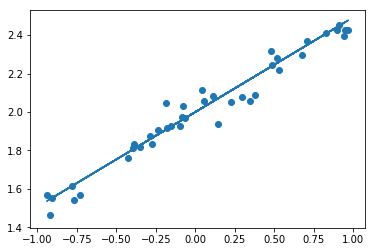

In [12]:
np.random.seed(1337)  
from keras.models import Sequential 
from keras.layers import Dense
import matplotlib.pyplot as plt

# 创建数据集
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # 将数据集随机化
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, )) # 假设我们真实模型为：Y=0.5X+2
# 绘制数据集plt.scatter(X, Y)
plt.show()

X_train, Y_train = X[:160], Y[:160]     # 把前160个数据放到训练集
X_test, Y_test = X[160:], Y[160:]       # 把后40个点放到测试集

# 定义一个model，
model = Sequential () # Keras有两种类型的模型，序贯模型（Sequential）和函数式模型
                      # 比较常用的是Sequential，它是单输入单输出的
model.add(Dense(output_dim=1, input_dim=1)) # 通过add()方法一层层添加模型
                                            # Dense是全连接层，第一层需要定义输入，
                                            # 第二层无需指定输入，一般第二层把第一层的输出作为输入

# 定义完模型就需要训练了，不过训练之前我们需要指定一些训练参数
# 通过compile()方法选择损失函数和优化器
# 这里我们用均方误差作为损失函数，随机梯度下降作为优化方法
model.compile(loss='mse', optimizer='sgd')

# 开始训练
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train) # Keras有很多开始训练的函数，这里用train_on_batch（）
    if step % 100 == 0:
        print('train cost: ', cost)

# 测试训练好的模型
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()    # 查看训练出的网络参数
                                        # 由于我们网络只有一层，且每次训练的输入只有一个，输出只有一个
                                        # 因此第一层训练出Y=WX+B这个模型，其中W,b为训练出的参数
print('Weights=', W, '\nbiases=', b)

# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
#plt.show()

## 3. Writing down three sceneries that machine learning has been used now.

In [ ]:
垃圾邮件分类，新闻资讯分类，广告推送

## 4. Come out with three new sceneries with which machine learning may be applied.

In [ ]:
个人征信评估，商业选址，推荐系统